In [24]:
import os
import numpy as np
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras_preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
import matplotlib.pyplot as plt

In [58]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.8.0


In [4]:
dataset = os.path.join(r'E:\project plan\indonesian food', '')

for dir in os.listdir(dataset):
  class_dir = os.path.join(dataset, dir)
  print('total images for', dir, 'is', len(os.listdir(class_dir)))

total images for Ayam Betutu is 211
total images for Bika Ambon is 212
total images for Empek-Empek is 212
total images for Gudeg is 220
total images for Gulai Ikan Patin is 200
total images for Kue Serabi is 200
total images for Lumpia is 223
total images for Mie Aceh is 210
total images for Rendang is 220
total images for Soto Banjar is 180


In [5]:
root_dir = 'E:/project plan/indonesian food/' 
classes_dir = os.listdir(root_dir)

train_ratio = 0.8
val_ratio  = 0.1

for cls in classes_dir:
    os.makedirs(root_dir +'train_dir/' + cls, exist_ok=True)
    os.makedirs(root_dir +'test_dir/' + cls, exist_ok=True)
    os.makedirs(root_dir +'val_dir/' + cls, exist_ok=True)
    
    src = root_dir + cls
    FileNames = os.listdir(src)

    np.random.shuffle(FileNames)
    train_FileNames, test_FileNames, val_FileNames = np.split(np.array(FileNames),
                                                              [int(train_ratio * len(FileNames)), 
                                                               int((1-val_ratio) * len(FileNames))])

    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    val_FileNames   = [src+'/' + name for name in val_FileNames.tolist()]
    print("\n Total images: ",cls, len(FileNames),
          '\n Training: ', len(train_FileNames),
          '\n Testing: ', len(test_FileNames),
          '\n Validation: ', len(val_FileNames))
    
    for name in train_FileNames:
      shutil.copy(name, root_dir +'train_dir/' + cls)
    for name in test_FileNames:
      shutil.copy(name, root_dir +'test_dir/' + cls)
    for name in val_FileNames:
      shutil.copy(name, root_dir +'val_dir/' + cls)


 Total images:  Ayam Betutu 211 
 Training:  168 
 Testing:  21 
 Validation:  22

 Total images:  Bika Ambon 212 
 Training:  169 
 Testing:  21 
 Validation:  22

 Total images:  Empek-Empek 212 
 Training:  169 
 Testing:  21 
 Validation:  22

 Total images:  Gudeg 220 
 Training:  176 
 Testing:  22 
 Validation:  22

 Total images:  Gulai Ikan Patin 200 
 Training:  160 
 Testing:  20 
 Validation:  20

 Total images:  Kue Serabi 200 
 Training:  160 
 Testing:  20 
 Validation:  20

 Total images:  Lumpia 223 
 Training:  178 
 Testing:  22 
 Validation:  23

 Total images:  Mie Aceh 210 
 Training:  168 
 Testing:  21 
 Validation:  21

 Total images:  Rendang 220 
 Training:  176 
 Testing:  22 
 Validation:  22

 Total images:  Soto Banjar 180 
 Training:  144 
 Testing:  18 
 Validation:  18


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "E:/project plan/indonesian food/train_dir"
val_dir = "E:/project plan/indonesian food/val_dir"
test_dir = "E:/project plan/indonesian food/test_dir"

train_datagen = ImageDataGenerator(rescale = 1/255
                                   )

val_datagen  = ImageDataGenerator(rescale = 1/255
                                   )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator =  val_datagen.flow_from_directory(val_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size=(224, 224))

Found 1668 images belonging to 10 classes.
Found 212 images belonging to 10 classes.


In [13]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
    
last_layer = pretrained_model.get_layer('block_6_project')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 64)


In [14]:
x = layers.Flatten()(last_output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

In [15]:
model_2 = Model(pretrained_model.input, x)
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

                                                                                                  
 dense_4 (Dense)                (None, 256)          3211520     ['flatten_2[0][0]']              
                                                                                                  
 dropout_2 (Dropout)            (None, 256)          0           ['dense_4[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 10)           2570        ['dropout_2[0][0]']              
                                                                                                  
Total params: 3,294,794
Trainable params: 3,214,090
Non-trainable params: 80,704
__________________________________________________________________________________________________


In [16]:
model_2.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

history = model_2.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=early)

Epoch 1/100
53/53 [==============================] - 55s 937ms/step - loss: 3.5543 - accuracy: 0.1960 - val_loss: 1.9614 - val_accuracy: 0.3208
Epoch 2/100
53/53 [==============================] - 42s 792ms/step - loss: 1.8922 - accuracy: 0.3267 - val_loss: 1.7656 - val_accuracy: 0.4481
Epoch 3/100
53/53 [==============================] - 43s 799ms/step - loss: 1.6388 - accuracy: 0.4317 - val_loss: 1.6253 - val_accuracy: 0.4245
Epoch 4/100
53/53 [==============================] - 43s 800ms/step - loss: 1.4320 - accuracy: 0.5120 - val_loss: 1.4176 - val_accuracy: 0.5566
Epoch 5/100
53/53 [==============================] - 43s 802ms/step - loss: 1.2292 - accuracy: 0.5971 - val_loss: 1.3515 - val_accuracy: 0.5330
Epoch 6/100
53/53 [==============================] - 43s 818ms/step - loss: 1.0999 - accuracy: 0.6325 - val_loss: 1.1494 - val_accuracy: 0.6415
Epoch 7/100
53/53 [==============================] - 43s 796ms/step - loss: 0.9772 - accuracy: 0.6876 - val_loss: 1.2462 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

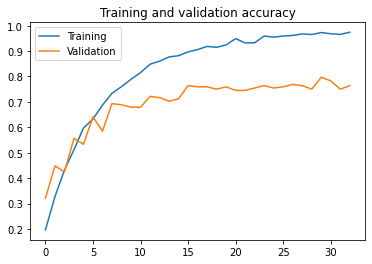

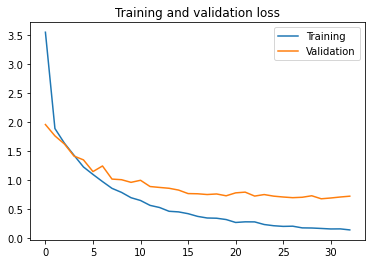

In [18]:
%matplotlib inline

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [19]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 207 images belonging to 10 classes.


In [20]:
results = model_2.evaluate(test_generator)

7/7 [==============================] - 5s 684ms/step - loss: 0.6533 - accuracy: 0.8309


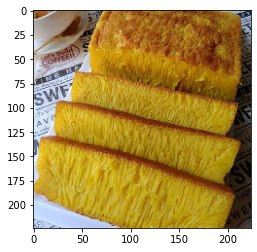

Ayam Betutu: 0.01%
Bika Ambon: 99.94%
Empek-Empek: 0.00%
Gudeg: 0.00%
Gulai Ikan Patin: 0.00%
Kue Serabi: 0.00%
Lumpia: 0.03%
Mie Aceh: 0.01%
Rendang: 0.00%
Soto Banjar: 0.00%


In [23]:
path = "E:/project plan/indonesian food/test_dir/Bika Ambon/081_5767c8f5.jpg"
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
labels = train_generator.class_indices.keys()
images = np.vstack([x])
predict = model_2.predict(images)[0]
plt.imshow(img)
plt.show()
for (label, p) in zip(labels, predict):
    print("{}: {:.2f}%".format(label, p * 100))

In [17]:
saved_model = "saved_model"
tf.saved_model.save(model_2, saved_model)

INFO:tensorflow:Assets written to: saved_model\assets


In [19]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
tflite_model = converter.convert()

with open('ofi224.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))